In [17]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

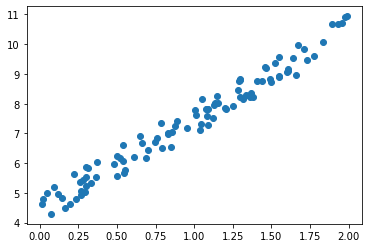

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [19]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[4.44696357],
       [3.05288423]])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [22]:
y_predict

array([[ 4.44696357],
       [10.55273204]])

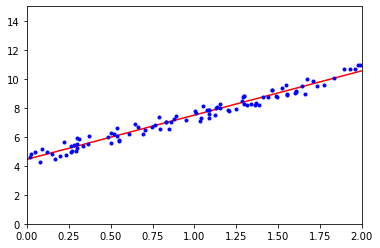

In [23]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [24]:
# Using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.44696357]), array([[3.05288423]]))

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.44696357],
       [3.05288423]])

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[4.44696357],
       [3.05288423]])

In [27]:
# Gradient Descent implementation
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.44696357],
       [3.05288423]])

In [28]:
# Stochastic Gradient Descent implementation

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyper parameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.45908705],
       [3.05140928]])

In [30]:
# Scikit learn stochastic gradient descent

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.41386104]), array([3.07713469]))

#### Polynomial Regression

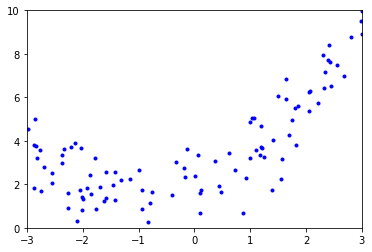

In [33]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.38734178]), array([2.38734178, 5.69940078]))

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99869615]), array([[0.92526761, 0.4949923 ]]))

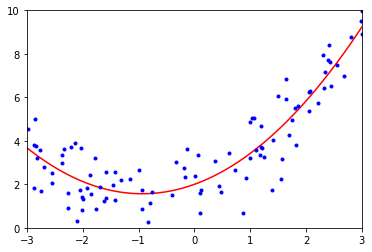

In [53]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [47]:
X_new

array([[-3],
       [ 3]])

In [48]:
y_predict

array([[7.02878568],
       [2.5442919 ],
       [2.11039142],
       [2.36109859],
       [1.99421488],
       [1.5663252 ],
       [2.00837819],
       [4.28941893],
       [3.49797687],
       [2.40091879],
       [2.4998222 ],
       [2.1341652 ],
       [1.77672977],
       [2.09713704],
       [3.64542748],
       [6.86613527],
       [1.57252831],
       [5.25569926],
       [3.79807945],
       [1.74475826],
       [1.56631433],
       [1.64051038],
       [5.00055357],
       [4.64394935],
       [3.61621422],
       [2.54867207],
       [2.25128909],
       [4.48908862],
       [4.68259936],
       [2.28791815],
       [3.4295634 ],
       [3.93589889],
       [5.11560626],
       [1.70723311],
       [1.86072534],
       [5.96839866],
       [3.26685807],
       [6.83241706],
       [2.07004132],
       [3.10921949],
       [8.49453969],
       [3.56853369],
       [2.59216998],
       [1.68333733],
       [3.17021732],
       [7.59949859],
       [4.22826645],
       [1.576

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(test_errors), "b-", label="val")
    plt.axis([0, 80, 0, 3])

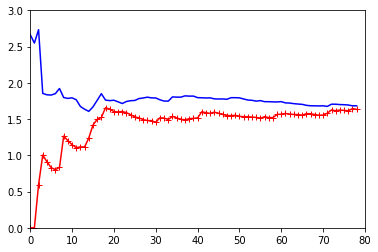

In [79]:
# Underfitting model

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [80]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

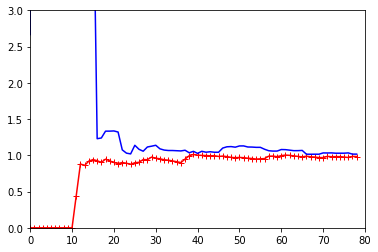

In [81]:
plot_learning_curves(polynomial_regression, X, y)

In [83]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.93351545]])

In [85]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.92760127])

In [87]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  # == to SGDRegressor(penalty="l1")
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.89056643])

In [88]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.89502608])

In [ ]:
# Early Stopping
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=41)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant",
                       eta0=0.005)  # warm starts allows to resume training

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [ ]:
minimum_val_error

#### Decision Boundaries with iris dataset

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [127]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [131]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [136]:
X = iris['data'][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if iris is virginica, else 0

In [137]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

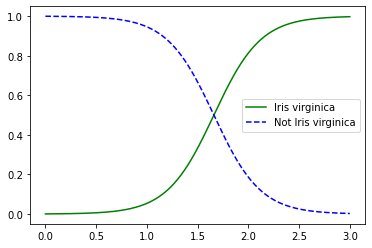

In [140]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

In [141]:
# Softmax Regression
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [142]:
softmax_reg.predict([[5, 2]])

array([2])

In [143]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])